# Visão Computacional com Aprendizado Profundo

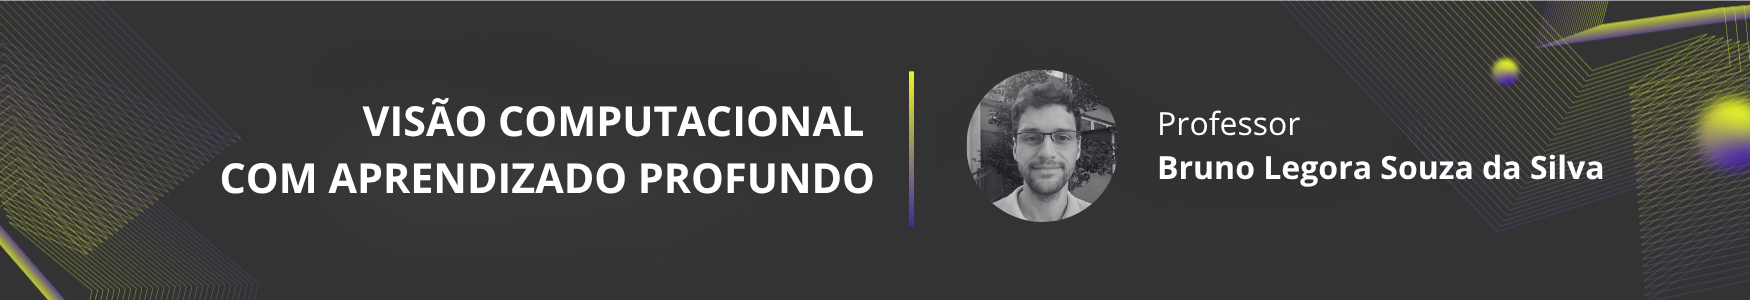

# Exercício Avaliativo nº 2

Esse exercício possui valor de 10 pontos na disciplina. Vocês irão encontrar 3 questões, façam elas nos campos de código indicados, sem remover nenhum campo de texto ou adicionar novos campos de código.

**COM EXCEÇÃO DA FUNÇÃO IMSHOW, NÃO É PERMITIDO USAR NENHUMA FUNÇÃO PRONTA DO OPENCV, EXCETO QUANDO EXPLICITADO**

In [42]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow
from sklearn.datasets import fetch_olivetti_faces


In [43]:

import cv2
from matplotlib import pyplot as plt
def cv2_imshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

### Questão nº 01 (3 pts)

Nesta questão, você deve implementar o descritor de imagens LBP, explicado no vídeo da semana e nos slides "Aula 4 - *Pipeline* Clássico de Tarefas de Visão Computacional".


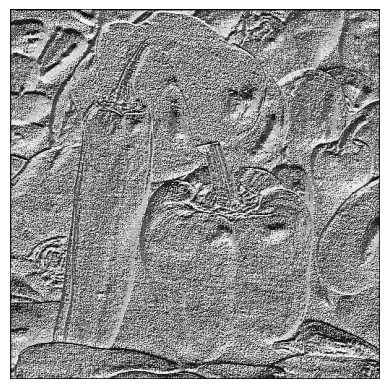

In [44]:
def local_binary_pattern(img):
    img_g = None
    # Se a imagem for colorida, converte para cinza
    if len(img.shape) == 3:
        img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Se já for cinza, apenas a copia
    else:
        img_g = img.copy()

    shape_img = img_g.shape # Altura e largura (cinza)
    # cv2_imshow(img_g)
    # print(shape_img)
    lbp_image = np.zeros_like(img_g)
    # print(lbp_image)
    # Começando em 1 porque é o centro do primeiro 3x3
    for i in range(1, shape_img[0] - 1):
        for j in range(1, shape_img[1] - 1):
            center_image = img_g[i, j] # Centro do 3x3
            binary = ''
            binary += '1' if img_g[i-1, j-1] >= center_image else '0'
            binary += '1' if img_g[i-1, j]   >= center_image else '0'
            binary += '1' if img_g[i-1, j+1] >= center_image else '0'
            binary += '1' if img_g[i,   j+1] >= center_image else '0'
            binary += '1' if img_g[i+1, j+1] >= center_image else '0'
            binary += '1' if img_g[i+1, j]   >= center_image else '0'
            binary += '1' if img_g[i+1, j-1] >= center_image else '0'
            binary += '1' if img_g[i,   j-1] >= center_image else '0'

            # Convertendo de binario para inteiro
            lbp_image[i, j] = int(binary, 2)
            # print(lbp_image[i,j])
    
    # print(lbp_image.size)

    #Contando quantos valores aparecem pra cada intensidade 
    # (ou seja, quantos 0, quantos 1 etc)
    histogram, _ = np.histogram(lbp_image.ravel(), bins=256, range=(0, 256))

    # Devolvendo as probabilidades de cada intensidade de cor
    histogram = histogram / histogram.sum()

    return lbp_image, histogram



img = cv2.imread('imgs/peppers.png')

img_lbp, lbp = local_binary_pattern(img)

# Mostrando o retorno da imagem do lbp
cv2_imshow(img_lbp)


### Questão nº 02 (5 pts)

Faça um *pipeline* completo para classificar a base de dados descrita abaixo. Utilize o descritor LBP implementado na Questão nº 01 e o classificador SVM utilizado no Laboratório 4 (classe SVC do módulo sklearn). Explique todos os passos realizados.

Características da base de dados:
- 400 imagens 64x64 de rostos de 40 humanos diferentes - todas em tons de cinza.
- 40 classes (40 humanos diferentes)

Observações:
  - Apenas a classe SVC é permitida nesse experimento. Não use as outras!
  - SVM é um classificador de 2 classes. Para usar ele com mais classes (ex: N classes), podemos escolher uma dessas estratégias:
      - Um contra Todos: N classificadores binários - para o i-ésimo classificador, as amostras positivas são da classe i, e as demais são consideradas negativas. O resultado é a classe cujo classificador obteve maior "confiança".
      - Um contra Um: N*(N-1)/2 classificadores. Um classificador é criado para cada par de classes. O resultado deve ser uma votação entre todos os classificadores
  - SVC trabalha com vetores e uma imagem é uma matriz. Use um histograma de LBP de cada imagem como vetor de características

In [45]:
#Não altere essa célula. Implemente seu código abaixo!
faces = fetch_olivetti_faces()
images = faces.images
targets = faces.target # targets

test_images_idx = [  7,  8,  9, 17, 18, 19, 27, 28, 29, 37, 38, 39,\
                    47, 48, 49, 57, 58, 59, 67, 68, 69, 77, 78, 79,\
                    87, 88, 89, 97, 98, 99,107,108,109,117,118,119,\
                   127,128,129,137,138,139,147,148,149,157,158,159,\
                   167,168,169,177,178,179,187,188,189,197,198,199,\
                   207,208,209,217,218,219,227,228,229,237,238,239,\
                   247,248,249,257,258,259,267,268,269,277,278,279,\
                   287,288,289,297,298,299,307,308,309,317,318,319,\
                   327,328,329,337,338,339,347,348,349,357,358,359,\
                   367,368,369,377,378,379,387,388,389,397,398,399]

train_images_idx = list(range(len(images)))

for idx in range(len(test_images_idx)-1,-1,-1):
  train_images_idx.pop(test_images_idx[idx])

train_images = images[train_images_idx]
train_targets = targets[train_images_idx]
test_images = images[test_images_idx]
test_targets = targets[test_images_idx]

In [46]:
# Implemente aqui!
X_train = []
X_test = []

# Extraindo os histogramas das imagens de treino
for img in train_images:
    _, hist = local_binary_pattern(img)
    X_train.append(hist)

# Extraindo os histogramas das imagens de teste
for img in test_images:
    _, hist = local_binary_pattern(img)
    X_test.append(hist)


# Convertendo para NumPy para poder ser usados com o SVM (os respectivos vetores de caracteristicas)
X_train = np.array(X_train)
X_test = np.array(X_test)



In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Criando o classificador com o kernel rbf
clf = SVC(kernel='rbf') 

# Treina com os dados de treino
clf.fit(X_train, train_targets)

# Faz previsões com as imagens de teste
y_pred = clf.predict(X_test)

# Calcula o quão bom foi o modelo
print("Acurácia:", accuracy_score(test_targets, y_pred))
print(classification_report(test_targets, y_pred))

Acurácia: 0.5583333333333333
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.25      0.67      0.36         3
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         3
           8       0.29      0.67      0.40         3
           9       0.20      0.33      0.25         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.14      0.33      0.20         3
          13       1.00      0.67      0.80         3
          14       1.00      0.33      0.50         3
          15       0.50      0.33      0.40         3
          16       0.50      1.00      0.67         

/home/kelvin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kelvin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kelvin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Considerações do modelo
O modelo acerta 100% algumas pessoas e erra completamentem em outras, ou seja, pode estar sofrendo de overtfitting.

### Questão nº 03 (2 pts)

O código abaixo implementa uma estratégia antiga e bastante conhecida na tarefa de reconhecimento de faces.
Ela recebe o nome de Eigenfaces, e utiliza Análise de Componentes Principais (PCA) para "comprimir" as informações importantes (e jogar as não tão relevantes fora) e classificar novas imagens com base nessa informação comprimida.

Resumidamente, o PCA extrai algumas informações do conjunto de dados, e um número N (de componentes principais) é escolhido para "resumir as informações importantes" em um espaço vetorial de N dimensões, ao invés de um espaço vetorial de dimensão igual ao número de pixels da imagem.


Nessa questão, você deve responder 2 perguntas simples:

1. Compare o resultado com o obtido na questão 2. Qual foi melhor? Quantas componentes principais são necessárias para o resultado ser melhor que a sua abordagem (se for possível)?
2. Estude o código abaixo e tente melhorar o resultado de 64% obtido com 5 componentes principais.Como você faria (sem alterar o número de componentes principais)? Sugira poucas alterações no código.
 
Use as duas células após o código para escrever sua resposta.

In [48]:
# Não altere essa célula. Responda na célula abaixo!
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

mean_face = np.mean(train_images,axis=0)

X_train = [(x - mean_face).flatten() for x in train_images]
n_components=5

pca = PCA(n_components=n_components, whiten=True).fit(X_train)

w = pca.transform(X_train)

# Teste:
predicted_class = [0]*len(test_images)

for i in range(len(test_images)):
  imag = (test_images[i] - mean_face).reshape((1,-1))
  w_i = pca.transform(imag)
  diff = w - w_i
  norms = np.linalg.norm(diff,axis=1)
  min_idx = norms.argmin()
  predicted_class[i] = train_targets[min_idx]

accuracy = accuracy_score(test_targets, predicted_class)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))


Acurácia do modelo: 64.2%


## Tentando melhorar o modelo

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

mean_face = np.mean(train_images,axis=0)

X_train = [(x - mean_face).flatten() for x in train_images]
n_components=5

pca = PCA(n_components=n_components, whiten=False).fit(X_train)

w = pca.transform(X_train)

# Teste:
predicted_class = [0]*len(test_images)

for i in range(len(test_images)):
  imag = (test_images[i] - mean_face).reshape((1,-1))
  w_i = pca.transform(imag)
  diff = w - w_i
  norms = np.linalg.norm(diff,axis=1)
  min_idx = norms.argmin()
  predicted_class[i] = train_targets[min_idx]

accuracy = accuracy_score(test_targets, predicted_class)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))


Acurácia do modelo: 69.2%


*Responda aqui!*

1 - Usando os 5 componentes já setados no código, o mesmo obteu 64% de acurácia, superando os 55% do código feito na questão 2.

2 - Não sabia o que significava o argumento "whiten", pesquisando e vi que era para forçar os componentes a terem variancia 1, o que pode destorcer os dados. Alterando para falso a acurácia aumentou para 69.2%.